# Kalorimetrie Laborversuch

Author: Maurizio Fell

Datum: 02.12.2023

Gruppe: 25

## Forschungsfrage

Beid diesem Laborversuch sollen Kalorimeterkonstante und Wärmekapazitäten drei verschiedener Proben ermittelt werden. Decken sich die ermittelten Ergebnisse mit den tatsächlichen Werten?

## Versuchsaufbau und Durchführung

Der Aufbau besteht aus einem Kalorimeter mit drei Temperatursensoren und Magnetrührer, einem Tauchsieder, einem Sous-Vide-Garer mit Heißwasserbad und einem RaspberryPi. Beim ersten Versuch, bei dem die Kalorimeterkonstante ermittelt werden soll, wird der Tauchsieder für eine gegebene Zeit eingeschaltet und in den Kalorimeter getaucht. 
Beim zweiten Versuch, bei dem die spezifischen Wärmekapazitäten der Proben ermittelt werden sollen, werden die Proben nacheinander auf eine Starttemperatur erhitzt und in den Kalorimeter gegeben. Man misst die Temperaturen und die Zeiten und berechnet damit die Werte.

<img src="figures/Versuchsaufbau.jpeg" width="800">


## Versuchsauswertung

In [169]:
import numpy as np
from matplotlib import pyplot as plt
import h5py as h5
import importlib
import json
import statistics
from functions import m_json
from functions import utility
# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Kalorimeterkonstante
Hinweis: Sie können die Funktion *get_json_entry* nutzen um auf Metadaten zuzugreifen. 

Für die Messdatenauswertung steht Ihnen bereits ein Modul utility.py zur Verfügung. Ergänzen sie die Funktionen im Modul zwischen TODO und DONE. Sie finden weitere Hinweise im jeweiligen Bereich TODO->DONE. 


#### (i) Messdaten einlesen
Lesen Sie die Messdaten in ihr Notebook ein.

In [170]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_const = "data/calorimetryconstant/calorimetryconstant.h5"

# DONE #

In [171]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
group_path = "RawData"
data_path = datafile_path_const
data_dict = utility.get_plot_data_from_dataset(data_path, group_path)

# DONE #

In [172]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.
# List the index of all calorimeter sensors (index_calorimeter) and
# the environment sensor (index_environment).
# You can use this variables to easily get access to the correct measurement data later.

index_calorimeter = [0,1,2]
index_environment = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

Die Mittelwerte und Standardabweichungen der Messungen werden in der nächsten Sektion geplottet.

Nachdem die Mittelwerte und Standardabweichungen berechnet wurden, können Daten jeder Wärmequelle jeweils in einem numpy.ndarray gespeichert werden.

In [173]:
importlib.reload(utility)
import statistics 
# TODO: Calculate the average value and standard deviation of the calorimeter sensors and the environment sensor.
# You can use the indices from above.
data1 = np.delete(data_dict["temperature"],3,0)
data2 = np.delete(data_dict["temperature"],[0,1,2],0)
mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data1)

mean_std_environment = utility.cal_mean_and_standard_deviation(data2)


# DONE #

#### (iii) Daten ploten

Im Kalorimeter befinden sich mehrere Sensoren, deren Mittelwerte sowie Standardabweichungen der Messung an jeden Zeitpunkt bestimmt wurden. Die Messdaten bzw. ihre Mittelwerte sollen in einem Plot eingetragen werden. Die Standardabweichungen der Sensoren sind als Errorbar im Plot zu sehen.

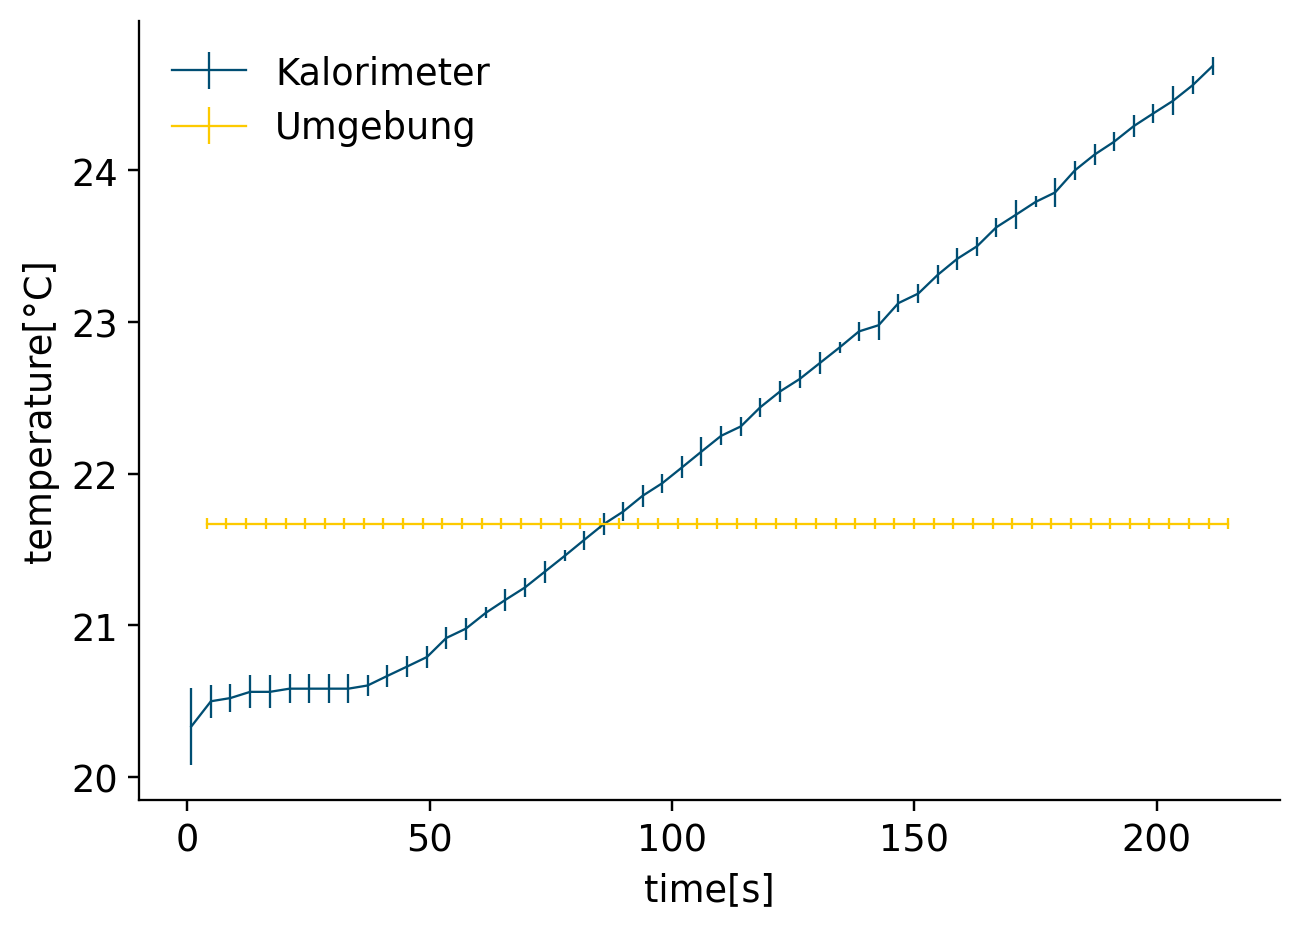

In [174]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting

utility.plot_temp_over_time(list([mean_std_calorimeter,mean_std_environment]),list([data_dict["timestamp"][0],data_dict["timestamp"][3]]),["Kalorimeter","Umgebung"],"time[s]","temperature[°C]")


# DONE #

#### (iv) Metadaten auslesen

Die notwendigen Daten bzw. Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [175]:
# Heat capacity of Water has been given
water_heat_capa = 4.18

# TODO: Read mass of the water from the metadata of the experiment.
f = open('data/calorimetryconstant/calorimeter_1ee5ec0c-0b57-68cd-9d39-c9b7e9b18753.json')
dmass = json.load(f)

water_mass = dmass["calorimeter"]["medium"]["mass"]["value"]
print("Wassermasse: ",water_mass, "gramm")
# DONE #

Wassermasse:  400 gramm


In [176]:
# TODO: Reading heater related data from hdf5 file, please use the same datafile_path_const variable for the HDF5 path.
# Hint: Note whether the data is stored as an array or a scalar in the hdf5 dataset.
with h5.File(datafile_path_const) as data:
        subg = list(data["RawData"]["1ee21744-0355-6023-94b4-d5c041dd32cd"])
        liste = []
        for i in subg:
            group = data["RawData"]["1ee21744-0355-6023-94b4-d5c041dd32cd"][i][()]
            liste.append(group)
            
        

current = liste[0]
heat_time = liste[1]
voltage = liste[2]

print("Stromstärke:", current, "Ampere")
print("Heiz Zeit:",heat_time, "Sekunden")
print("Spannung:",voltage, "Volt")
# DONE #

Stromstärke: 4.0 Ampere
Heiz Zeit: 180.0 Sekunden
Spannung: 11.8 Volt


#### (v) Anfangs- und Endwert der Temperatur
Die Anfangs- und Endwert der Temperatur im Kloriemeter sind notwendig, um die Wärmekapazität zu bestimmen. 

Eine Möglichkeit wäre, durch das Maxium bzw. Minium und einen Schwellenwert ist ein Teil der Daten zu entnehmen. 

Daraus sind Mittelwerte zu berechnen. Die entsprechenden Mittelwerte können als Anfangs- und Endtemperatur verwendet werden.

In [177]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity
tempdata = mean_std_calorimeter[0]
threshold = 0.05
len(tempdata)
temperature_end, temperature_start = utility.get_start_end_temperature(tempdata,threshold) 
print("T2 =",round(temperature_end,3),"°C")
print("T1 =",round(temperature_start,3), "°C")
# DONE #

T2 = 24.088 °C
T1 = 20.722 °C


#### (vi) Kalorimeterkonstante bestimmen
$$
C = \frac{UI\Delta t}{(T_2 - T_1)}
$$

In [178]:
# TODO: Calculate heat capacity of the calorimeter

calorimeter_const = (voltage*current*heat_time)/(temperature_end-temperature_start)

# DONE #

#### (Vii) Ergebnis

In [179]:
print("C =",round(calorimeter_const,3),"J/K")


C = 2524.032 J/K


### spezifische Wärmekapazität: erste Probe


#### (i) Messdaten einlesen

In [180]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob1 = "data/Proben/Proben.h5"

# DONE #

In [181]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
group_path = "RawData"
data_path = datafile_path_prob1
data_dict = utility.get_plot_data_from_dataset(data_path, group_path)
# DONE #

In [182]:


# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0,1,2]
index_bath = [4]
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [183]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.
data1 = np.delete(data_dict["temperature"],[3,4],0)
data2 = np.delete(data_dict["temperature"],[0,1,2,4],0)
data3 = np.delete(data_dict["temperature"],[0,1,2,3],0)

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data1)
mean_std_environment = utility.cal_mean_and_standard_deviation(data2)
mean_std_heater = utility.cal_mean_and_standard_deviation(data3)
# DONE #

#### (iii) Daten ploten

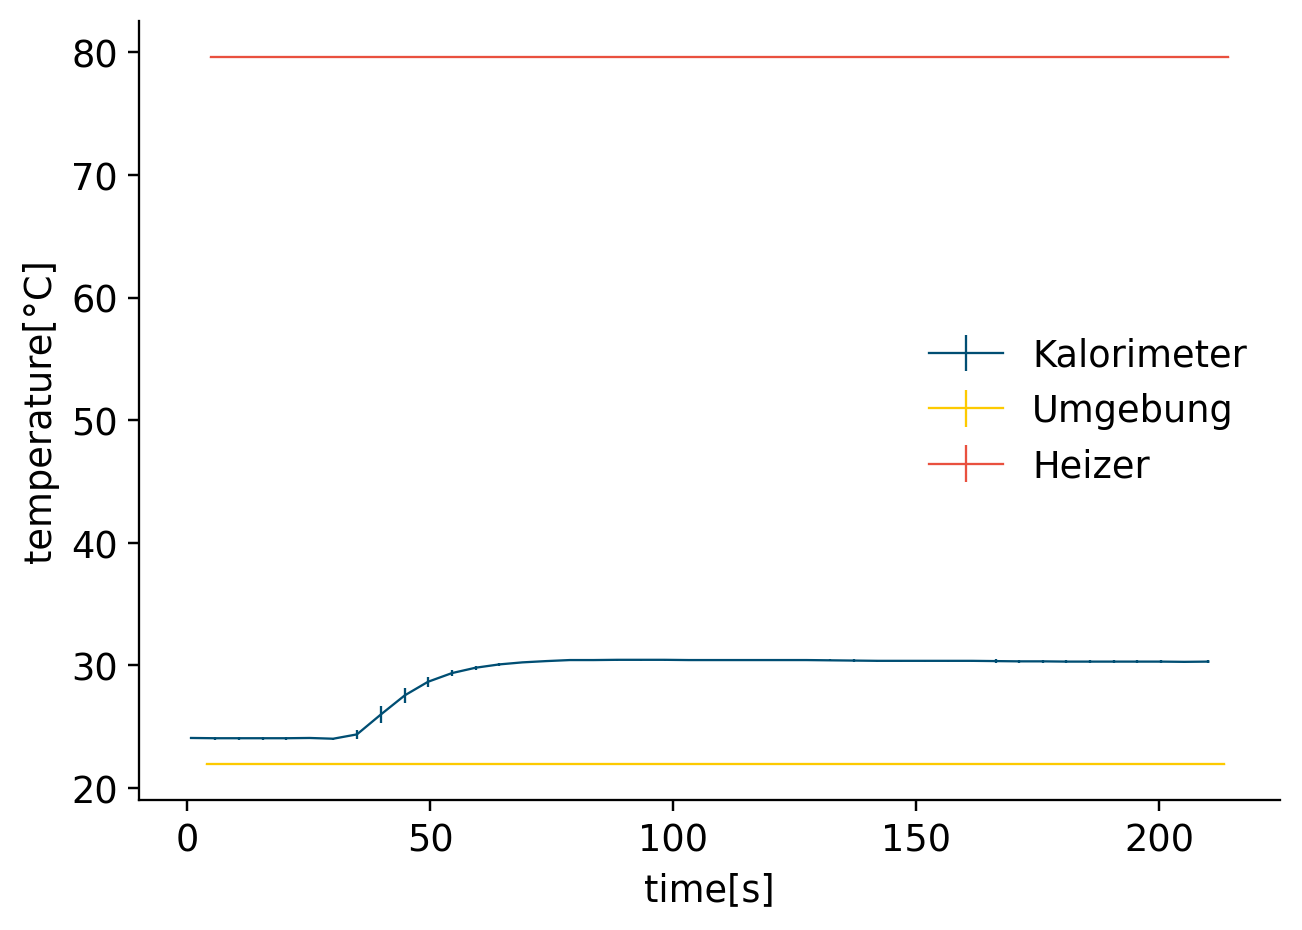

In [184]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

utility.plot_temp_over_time(list([mean_std_calorimeter,mean_std_environment,mean_std_heater]),list([data_dict["timestamp"][0],data_dict["timestamp"][3],data_dict["timestamp"][4]]),["Kalorimeter","Umgebung","Heizer"],"time[s]","temperature[°C]")

# DONE #

#### (iv) Metadaten auslesen

In [185]:
# TODO: Read mass of the sample from the metadata of the experiment.
f = open('data/Proben/setup_PDCX.json')
dmass = json.load(f)
sample_mass = int(dmass["setup"]["1ee8d2e5-fd24-6bfc-b2b2-2f4865d44cdf"]["comment"])
print("Messing Probe:",sample_mass, "gramm")
# DONE #

Messing Probe: 705 gramm


#### (v) Anfangs- und Endwert der Temperatur
Die Mischungstemperatur und Anfangstemperatur des Kalorimeters sind für die Berechnung relevant.

In [186]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity
threshold = 0.05
tempdata = mean_std_calorimeter[0] 
temperature_mix, temperature_start_water = utility.get_start_end_temperature(tempdata,threshold) 
print("TM =",round(temperature_mix,3),"°C")
print("T1",round(temperature_start_water,3),"°C")
# DONE #

TM = 30.322 °C
T1 24.101 °C


In [187]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 temperature-values after the start of the measurement.
liste = []
for i in range(10):
    twert = data_dict["temperature"][4][i]
    liste.append(twert)

temperature_start_sample = statistics.mean(liste)
print("T2 =",round(temperature_start_sample,3),"°C")
# DONE #

T2 = 79.656 °C


#### (vi) spezifische Wärmekapazität bestimmen
$$
c_p = \frac{C(T_M-T_1)}{m_p(T_2-T_M)}
$$

In [188]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = (calorimeter_const*(temperature_mix-temperature_start_water))/(sample_mass*(temperature_start_sample-temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [189]:
print("cp =",round(sample_heat_capa,3),"J/gK")

cp = 0.451 J/gK


### spezifische Wärmekapazität: zweite Probe


#### (i) Messdaten einlesen

In [190]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob2 = "data/Probe2/Probe2.h5"

# DONE #

In [191]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
group_path = "RawData"
data_path = datafile_path_prob2
data_dict = utility.get_plot_data_from_dataset(data_path,group_path)

# DONE #

In [192]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0,1,2]
index_bath = [4]
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [193]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.
data1 = np.delete(data_dict["temperature"],[3,4],0)
data2 = np.delete(data_dict["temperature"],[0,1,2,4],0)
data3 = np.delete(data_dict["temperature"],[0,1,2,3],0)

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data1)
mean_std_environment = utility.cal_mean_and_standard_deviation(data2)
mean_std_heater = utility.cal_mean_and_standard_deviation(data3)

# DONE #

#### (iii) Daten ploten

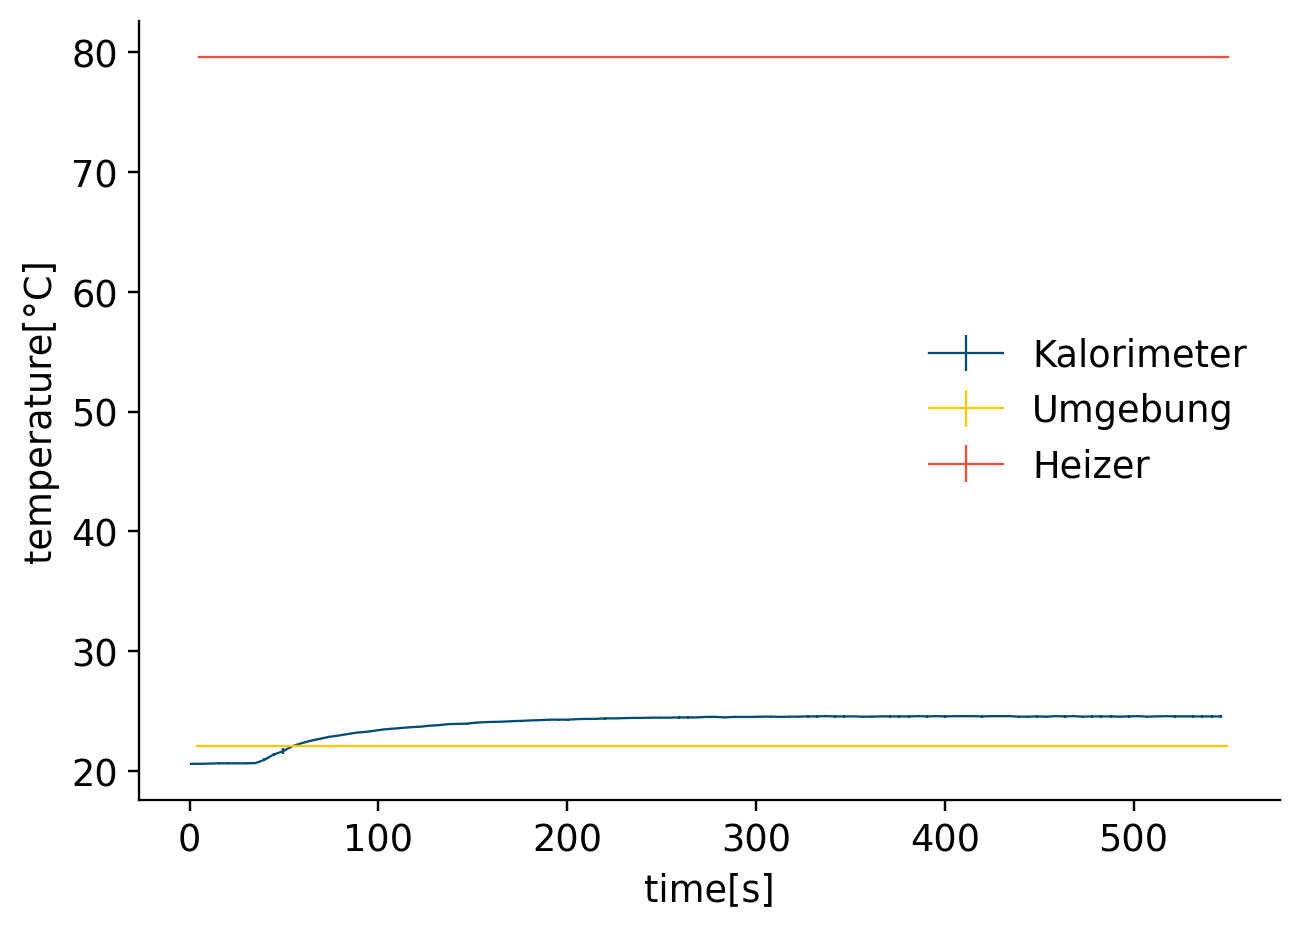

In [194]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

utility.plot_temp_over_time(list([mean_std_calorimeter,mean_std_environment,mean_std_heater]),list([data_dict["timestamp"][0],data_dict["timestamp"][3],data_dict["timestamp"][4]]),["Kalorimeter","Umgebung","Heizer"],"time[s]","temperature[°C]")

# DONE #

#### (iv) Metadaten auslesen

In [195]:
# TODO: Read mass of the sample from the metadata of the experiment.
f = open('data/Probe2/setup_PDCXX.json')
dmass = json.load(f)
sample_mass = int(dmass["setup"]["1ee8d2e6-ddc1-697d-9dbe-20f5560edcb1"]["comment"])
print("ABS Probe:",sample_mass, "gramm")

# DONE #

ABS Probe: 84 gramm


#### (v) Anfangs- und Endwert der Temperatur

In [196]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity
threshold = 0.05
tempdata = mean_std_calorimeter[0] 
temperature_mix, temperature_start_water = utility.get_start_end_temperature(tempdata,threshold) 
print("TM =",round(temperature_mix,3),"°C")
print("T1",round(temperature_start_water,3),"°C")
# DONE #

TM = 24.393 °C
T1 20.74 °C


In [197]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.
liste = []
for i in range(10):
    twert = data_dict["temperature"][4][i]
    liste.append(twert)
temperature_start_sample = statistics.mean(liste)
print("T2 =",round(temperature_start_sample,3),"°C")
# DONE #

T2 = 79.588 °C


#### (vi) spezifische Wärmekapazität bestimmen

In [198]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = (calorimeter_const*(temperature_mix-temperature_start_water))/(sample_mass*(temperature_start_sample-temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [199]:
print("cp =",round(sample_heat_capa,3),"J/gK")

cp = 1.989 J/gK


### spezifische Wärmekapazität: dritte Probe


#### (i) Messdaten einlesen

In [200]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob3 = "data/probe3/probe3.h5"

# DONE #

In [201]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

group_path = "RawData"
data_path = datafile_path_prob3
data_dict = utility.get_plot_data_from_dataset(data_path,group_path)
# DONE #

In [202]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0,1,2]
index_bath = [4]
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [203]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

data1 = np.delete(data_dict["temperature"],[3,4],0)
data2 = np.delete(data_dict["temperature"],[0,1,2,4],0)
data3 = np.delete(data_dict["temperature"],[0,1,2,3],0)

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data1)
mean_std_environment = utility.cal_mean_and_standard_deviation(data2)
mean_std_heater = utility.cal_mean_and_standard_deviation(data3)

# DONE #

#### (iii) Daten ploten

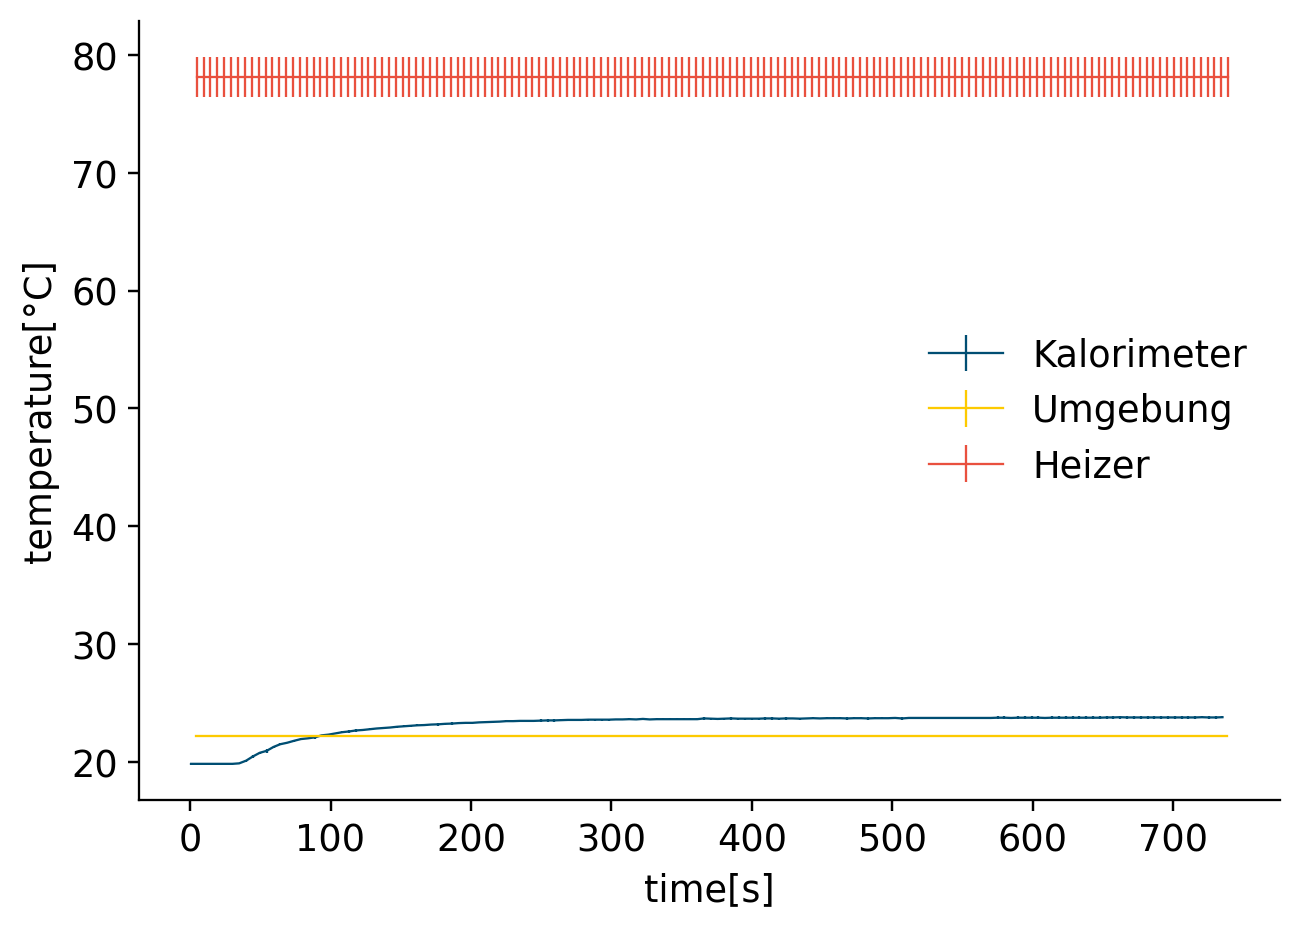

In [204]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

utility.plot_temp_over_time(list([mean_std_calorimeter,mean_std_environment,mean_std_heater]),list([data_dict["timestamp"][0],data_dict["timestamp"][3],data_dict["timestamp"][4]]),["Kalorimeter","Umgebung","Heizer"],"time[s]","temperature[°C]")


# DONE #

#### (iv) Metadaten auslesen

In [205]:
# TODO: Read mass of the sample from the metadata of the experiment.

f = open('data/probe3/setup_PDCXXX.json')
dmass = json.load(f)
sample_mass = int(dmass["setup"]["1ee8d2e7-3891-6e22-845a-ec194a39cd5e"]["comment"])
print("PVC Probe:",sample_mass, "gramm")

# DONE #

PVC Probe: 111 gramm


#### (v) Anfangs- und Endwert der Temperatur

In [206]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

threshold = 0.05
tempdata = mean_std_calorimeter[0] 
temperature_mix, temperature_start_water = utility.get_start_end_temperature(tempdata,threshold) 
print("TM =",round(temperature_mix,3),"°C")
print("T1",round(temperature_start_water,3),"°C")

# DONE #

TM = 23.585 °C
T1 20.004 °C


In [207]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

liste = []
for i in range(10):
    twert = data_dict["temperature"][4][i]
    liste.append(twert)
temperature_start_sample = statistics.mean(liste)
print("T2 =",round(temperature_start_sample,3),"°C")

# DONE #

T2 = 79.588 °C


#### (vi) spezifische Wärmekapazität bestimmen

In [208]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = (calorimeter_const*(temperature_mix-temperature_start_water))/(sample_mass*(temperature_start_sample-temperature_mix))


# DONE #

#### (Vii) Ergebnis

In [209]:
print("cp =",round(sample_heat_capa,3),"J/gK")

cp = 1.454 J/gK


## Diskussion

Die ermittelten Wärmekapazitäten weichen leider nicht unwesentlich von den tatsächlichen Werten ab (cpMessing: 0.389 J/gK =/= 0.451 J/gK, cpABS: 1.40 J/gK =/= 1.989 J/gK, cpPVC: 0.85 J/gK =/= 1.454 J/gK). Dies könnte an Messfehlern der Sensoren liegen oder an einer nicht ordnungsgemäßen Durchführung der Versuche. Ein Fehler in der Ausarbeitung, beispielsweise bei der Programmierung der Funktionen könnte auch daran Schuld sein, wobei ich leider keinen Fehler ausfindig machen konnte. Beim Übergang der Proben vom Heißwasserbad in den Kalorimeter wurde darauf geachtet, dass möglichst wenig Wasser mittransportiert wird. Daher kann man Annehmen, dass die geringe mittransportierte Wassermenge keine sonderliche Auswirkung auf das Ergebnis hatte. 

## Fazit
Bei dem Versuch habe ich gelernt, praktisch einen Versuch im Labor durchzuführen und im Team zu arbeiten. Außerdem habe ich feststellen müssen, dass es nicht unkompliziert ist einen zum tatsächlichen ähnlichen Wert im Versuch zu ermitteln, da es viele Fehlerquellen geben kann, darunter auch eigene menschliche Fehler.